# British Airways Reviews Analysis

---
### Importing Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from wordcloud import WordCloud, STOPWORDS

### Web scraping 

Web Scraping Reviews from Link: [https://www.airlinequality.com/airline-reviews/british-airways] 

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...


In [4]:
df.to_csv("BA_reviews.csv")

### Text Cleaning

In [5]:
df.head()

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...


In [6]:
for index, row in df.iterrows():
    row['reviews'] = row['reviews'].split('|')[1]

In [7]:
df.head()

,reviews
0,My family and I have flown mostly on British...
1,This has been by far the worst service I hav...
2,In Nov 2022 I booked and paid for a return j...
3,BA is not treating its premium economy passen...
4,24 hours before our departure on BA059 to Ca...


In [8]:
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

df_clean = pd.DataFrame()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_clean['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean

,reviews
0,My family I flown British Airways 30 years. I ...
1,This far worst service I plane. It's obvious f...
2,In Nov 2022 I booked paid return journey New Z...
3,BA treating premium economy passengers respect...
4,24 hours departure BA059 Cape Town Heathrow Th...
...,...
995,Glasgow Miami London. Glasgow Heathrow painles...
996,London Heathrow Budapest. After disappointing ...
997,Budapest London Heathrow. The flight departed ...
998,London Toronto. Group 10 people age 2 60. Busi...


### WordCloud of All Reviews

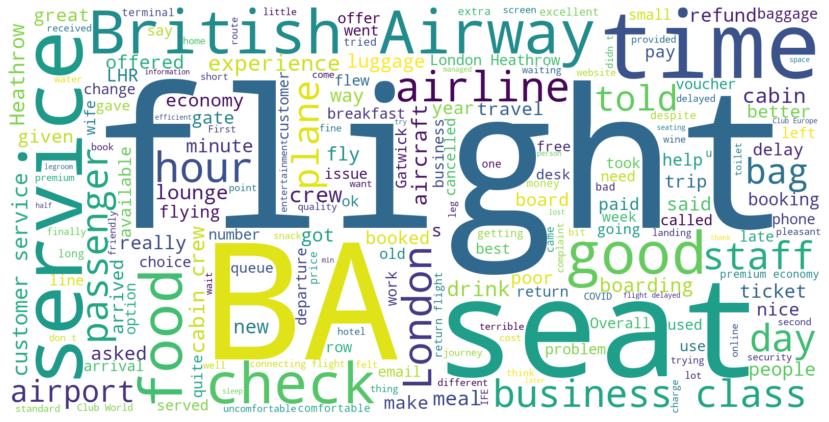

In [9]:
text = " ".join(reviews for reviews in df_clean.reviews)
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(text)
plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Sentiment Analysis Using Vader Sentiment Scoring

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [11]:

def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound']>= 0.05):
    polarity = "positive"

  elif(output_dict['compound']<= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sia.polarity_scores(text)
  return format_output(output_dict)

# Run the predictions
df["vader_prediction"] = df_clean["reviews"].apply(predict_sentiment)
df["vader_prediction"] = df["reviews"].apply(predict_sentiment)

In [12]:
df

,reviews,vader_prediction
0,My family and I have flown mostly on British...,positive
1,This has been by far the worst service I hav...,negative
2,In Nov 2022 I booked and paid for a return j...,negative
3,BA is not treating its premium economy passen...,positive
4,24 hours before our departure on BA059 to Ca...,negative
...,...,...
995,Glasgow to Miami via London. Glasgow to Heat...,positive
996,London Heathrow to Budapest. After so much d...,negative
997,Budapest to London Heathrow. The flight depa...,positive
998,London to Toronto. Group of 10 people age fr...,positive


In [13]:
df['vader_prediction'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [14]:
print('Positive Reviews:',(df['vader_prediction']=='positive').sum())
print('Negative Reviews:',(df['vader_prediction']=='negative').sum())
print('Neutral Reviews:',(df['vader_prediction']=='neutral').sum())

Positive Reviews: 505
Negative Reviews: 482
Neutral Reviews: 13


([<matplotlib.patches.Wedge at 0x7fa4ef3e59a0>,
 [Text(-0.01727803256672635, 1.0998642959886566, 'Positive'),
  Text(-0.02764316099622913, -1.0996526068036836, 'Negative'),
  Text(1.0990827445852027, -0.04491236528015833, 'Neutral')],
 [Text(-0.009424381400032553, 0.5999259796301762, '50.5%'),
  Text(-0.015078087816124979, -0.5998105128020091, '48.2%'),
  Text(0.5994996788646559, -0.024497653789177266, '1.3%')])

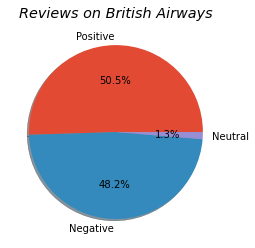

In [15]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [(df['vader_prediction']=='positive').sum()
         , (df['vader_prediction']=='negative').sum()
         , (df['vader_prediction']=='neutral').sum()]

fig, ax = plt.subplots()
plt.title(label="Reviews on British Airways",
          loc="center",
          fontstyle='italic')
ax.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True,radius=1)

In [16]:
df_pos = df.loc[df['vader_prediction']=='positive']
df_neg = df.loc[df['vader_prediction']=='negative']

### Wordcloud of Positive Reviews

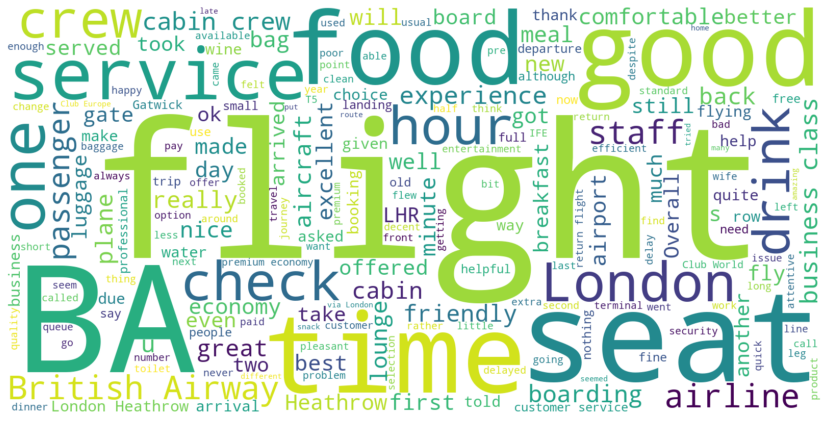

In [23]:
text = " ".join(reviews for reviews in df_pos.reviews)
wordcloud = WordCloud(background_color="white",width=1600, height=800,).generate(text)
plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Wordcloud Of Negative Reviews

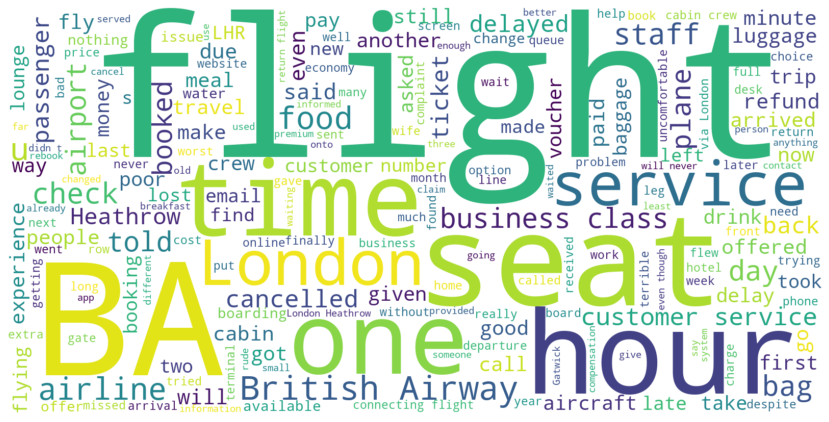

In [18]:
text = " ".join(reviews for reviews in df_neg.reviews)
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(text)
plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()